In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-dataset/online_retail.csv


# 🛒 Customer Purchase Behavior Analysis  

Understanding customer behavior is one of the most important tasks in retail and e-commerce.  
In this notebook, I analyze the **Online Retail Dataset** to explore how customers purchase, how much revenue they generate, and what patterns exist in the data.  

### 🔍 Objectives
- Perform **data cleaning & preprocessing** (handle missing values, duplicates, outliers).  
- Create **new features** such as TotalAmount and time-based features.  
- Explore **sales patterns** by product, country, and time.  
- Identify **top customers & spending behavior**.  
  
### 🛠️ Tools & Libraries
- **Pandas, Numpy** → Data cleaning & preprocessing  
- **Matplotlib, Seaborn** → Visualization  
 
The final goal is to gain insights into **customer behavior & sales trends** that can help businesses make data-driven decisions.  


In [2]:
import pandas as pd

**LOADING DATA**

In [3]:
df=pd.read_csv("/kaggle/input/online-retail-dataset/online_retail.csv")
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
InvoiceNo       object
Stock

**HANDLE MISSING VALUES**

In [4]:
print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
print(df['CustomerID'].unique())
df['CustomerID']=df['CustomerID'].fillna(method='ffill')
df['Description']=df['Description'].fillna(method='ffill')
print(df['CustomerID'].isna().sum())
print(df['Description'].isna().sum())

[17850. 13047. 12583. ... 13298. 14569. 12713.]
0
0


/tmp/ipykernel_13/463281849.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CustomerID']=df['CustomerID'].fillna(method='ffill')
/tmp/ipykernel_13/463281849.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Description']=df['Description'].fillna(method='ffill')


**CHECKING DUPLICATES**


In [6]:
print(df.duplicated().sum())
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

5268
(541909, 8)
(536641, 8)


**FEATURE ENGINEERING**

In [7]:
df["TotalAmount"]=df.apply(lambda x:x["Quantity"]*x["UnitPrice"],axis=1)
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  


In [8]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],errors="coerce")
df["Year"]  = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"]   = df["InvoiceDate"].dt.day
df["Hour"]  = df["InvoiceDate"].dt.hour
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Month  Day  Hour  
0  2010     12    1     8  
1  2010     12    1     8  
2  2010     12    1 

**OUTLIER DETECTION**

In [9]:
df_cleaned = df.copy()
numeric_cols=["Quantity","UnitPrice","TotalAmount"]
# Remove outliers from Quantity using IQR
for cols in numeric_cols:
    Q1 = df_cleaned[cols].quantile(0.25)
    Q3 = df_cleaned[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[(df_cleaned["Quantity"] > lower) & (df_cleaned["Quantity"] <= upper)]
df_cleaned = df_cleaned[(df_cleaned["UnitPrice"] > lower) & (df_cleaned["UnitPrice"] <= upper)]
df_cleaned = df_cleaned[(df_cleaned["TotalAmount"] > lower) & (df_cleaned["TotalAmount"] <= upper)]
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (536641, 13)
After outlier removal: (485018, 13)


**DATA VISUALIZATION**

In [10]:
from matplotlib import pyplot as plt

In [11]:
print(df_cleaned[numeric_cols].describe())

            Quantity      UnitPrice    TotalAmount
count  485018.000000  485018.000000  485018.000000
mean        5.587184       3.160572      10.158993
std         6.456340       3.258252       8.416664
min       -16.000000       0.000000     -16.670000
25%         1.000000       1.250000       3.300000
50%         3.000000       2.080000       8.260000
75%         8.000000       4.130000      15.600000
max        37.000000      37.500000      37.800000


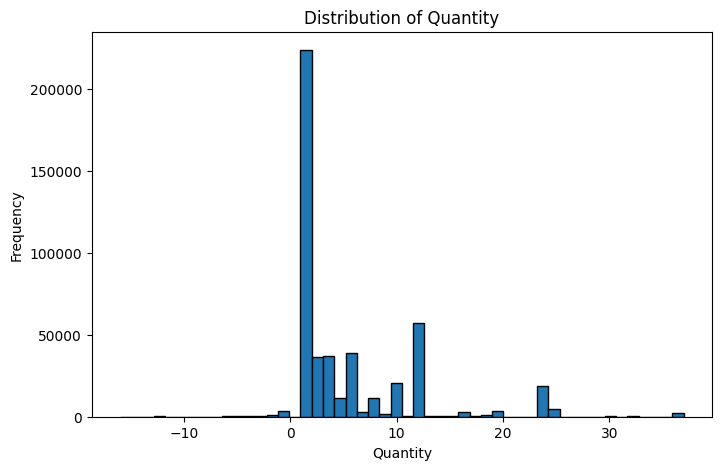

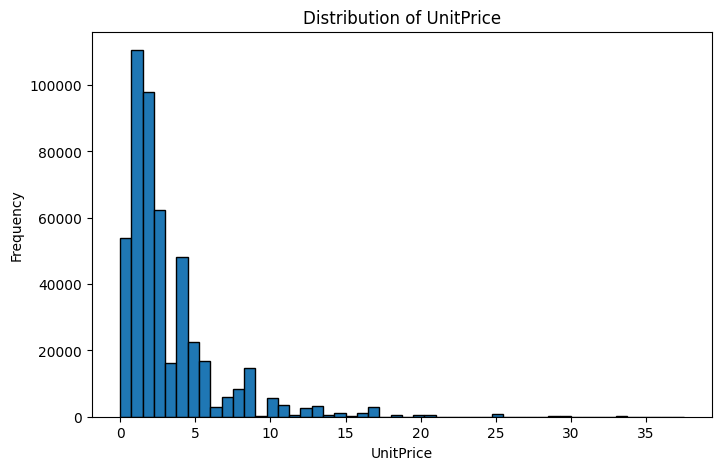

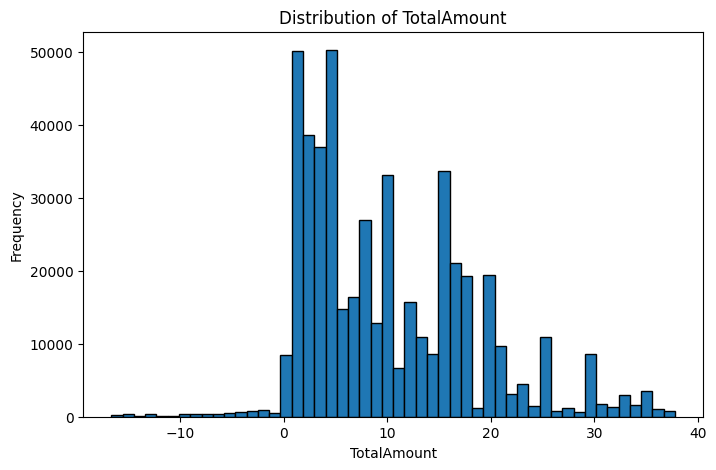

In [12]:
for cols in numeric_cols:
    plt.figure(figsize=(8,5))
    plt.hist(df_cleaned[cols], bins=50, edgecolor="black")
    plt.title(f'Distribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel("Frequency")
    plt.show()


In [13]:
# Top 10 most sold products by Quantity
top_products = df_cleaned.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
PACK OF 72 RETROSPOT CAKE CASES       16135
ASSORTED COLOUR BIRD ORNAMENT         10841
LUNCH BAG RED RETROSPOT                9997
JUMBO BAG RED RETROSPOT                9744
WHITE HANGING HEART T-LIGHT HOLDER     9614
JAM MAKING SET PRINTED                 9485
PACK OF 60 PINK PAISLEY CAKE CASES     9152
MINI PAINT SET VINTAGE                 9079
60 TEATIME FAIRY CAKE CASES            8896
VICTORIAN GLASS HANGING T-LIGHT        8205
Name: Quantity, dtype: int64


**BIVARITE ANALYSIS**

In [14]:
import seaborn as sns

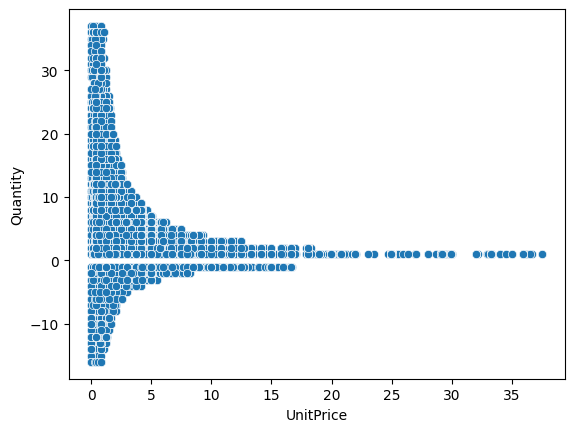

In [15]:
# Unit Price vs Quantity
sns.scatterplot(x='UnitPrice',y='Quantity',data=df_cleaned)
plt.show()
# More quantity sold at low price

<function matplotlib.pyplot.show(close=None, block=None)>

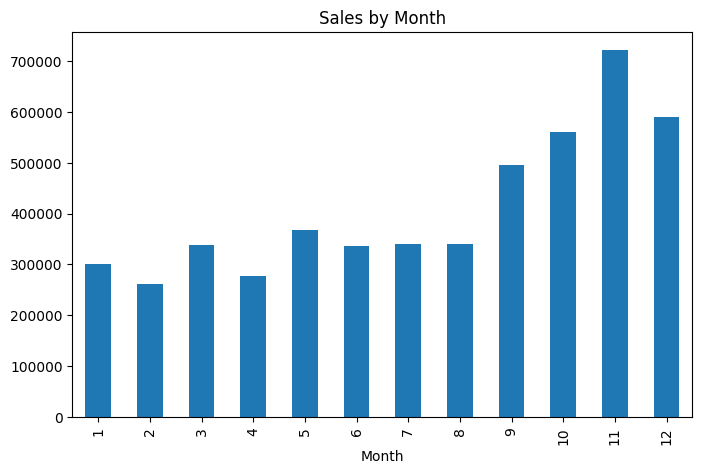

In [16]:
# Month vs Total Sales
monthly_sales=df_cleaned.groupby("Month")["TotalAmount"].sum()
monthly_sales.plot(kind="bar", figsize=(8,5), title="Sales by Month")
plt.show
# Month 11 shows highest sales

# ✅ Conclusion & Insights  

From the analysis, we can summarize key findings:  

- The dataset required **cleaning**: missing CustomerIDs, duplicate rows, and unrealistic outliers were handled.  
- After feature engineering, **TotalAmount (Quantity × Price)** gave us a clear view of customer spending.  
- **Most popular products** were identified, showing which items drive the most sales volume.  
- **Monthly and country-level trends** highlighted how sales vary over time and across regions.  
.  
### 🚀 Real-World Impact
These insights can help a business to:    
- Improve inventory by identifying **top-selling products**.  
- Understand **seasonal sales patterns** for better planning.  

This project gave me hands-on experience in **data preprocessing, feature engineering, and visualization**, which are essential skills for real-world Data Science and ML projects.  
